# SI 618: Data Manipulation and Analysis
## 04 - Visualization & Univariate Statistics

### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

Version 2023.09.20.1.CT


## Overview of today 

- Announcements 
- Comments/Questions/Concerns
- Review last week: Aggregation & Grouping
- Today: Univariate Statistics  & Visualization

In [1]:
import pandas as pd
import numpy as np

## A quick note about Markdown cells
We have encouraged you to use Markdown cells to add text to your notebooks.  Please see 
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html for a more complete explanation of the use of Markdown in Jupyter.  You can also examine any of the existing Markdown blocks by clicking on them.

### IMPORTANT: Replace ```?``` in the following code with your uniqname.

In [2]:
MY_UNIQNAME = 'yanlunar'

## Aggregation and Grouping (review)

### Group By

In [3]:
from io import StringIO

TESTDATA=StringIO("""State,Retailer,Fruit,Sales
MI,Walmart,Apple,100
MI,Wholefoods,Apple,150
MI,Kroger,Orange,180
CA,Walmart,Apple,220
CA,Wholefoods,Apple,180
CA,Safeway,Apple,220
CA,Safeway,Orange,110
NY,Walmart,Apple,90
NY,Walmart,Orange,80
NY,Wholefoods,Orange,120
""")

fruit = pd.read_csv(TESTDATA, index_col=None)

In [4]:
fruit.head()

,State,Retailer,Fruit,Sales
0,MI,Walmart,Apple,100
1,MI,Wholefoods,Apple,150
2,MI,Kroger,Orange,180
3,CA,Walmart,Apple,220
4,CA,Wholefoods,Apple,180


#### (a) What is the total sales for each state?
This requires us to group by state, and aggregate sales by taking the sum.

The easiest way of doing this if to use `groupby`

If you execute groupby on the dataframe what you'll get back is an object called DataFrameGroupBy

In [5]:
fruit.groupby('State')

On its own it's a bit useless... it just keeps track of which rows should go into each "pile" (where pile here means a unique group for each state)

If we ask this object to describe itself, you can see what is inside notice that it threw away all the other columns because they were not numerical.  Only "Sales" which is a number, was kept

In [6]:
fruit.groupby('State').describe()

Sales                                                          
      count        mean        std    min    25%    50%    75%    max
State                                                                
CA      4.0  182.500000  51.881275  110.0  162.5  200.0  220.0  220.0
MI      3.0  143.333333  40.414519  100.0  125.0  150.0  165.0  180.0
NY      3.0   96.666667  20.816660   80.0   85.0   90.0  105.0  120.0

In [7]:
# What are the total sales for each state?
fruit.groupby('State')['Sales'].sum()  # instead of size()

State
CA    730
MI    430
NY    290
Name: Sales, dtype: int64

What just happend? A couple of things:
- `groupby()` got first executed on `df`, returning an `DataFrameGroupBy` object. This object itself is useless unless coupled with an aggregation function, such as `sum()`, `mean()`, `max()`, `apply()`.
- Then, `sum()` got executed on the `DataFrameGroupBy` object, generating the `DataFrame` object you see above. Notice how the table looks different than the original DataFrame `df`? Here are the differences:
  - The `State` column now becomes the index of the DataFrame. The string "State" is the name of the index. Notice how the index name is displayed on a lower level than column names.
  - Since we performed a `groupby` operation by `State`, so only the unique values of `State` are kept as index.
  - Among the other columns, Retailer, Fruit, and Sales, only Sales is kept in the result table. This is because the aggregation function `sum()` only knows how to aggregate numerical values. And only Sales is a numerical column. The other columns are hence dropped.

#### (b) What is the total sales for each state for each fruit?
This requires us to perform `groupby` on two columns. So, we provide a list of column names to the `groupby` function.

Don't forget that an aggregation function needs to follow the `groupby` function in order to generate results.

In [8]:
# What is the total sales for each state for each fruit?
fruit.groupby(['State', 'Fruit'])['Sales'].sum()

State  Fruit 
CA     Apple     620
       Orange    110
MI     Apple     250
       Orange    180
NY     Apple      90
       Orange    200
Name: Sales, dtype: int64

How is this DataFrame different from the previous one?

The biggest different is that this DataFrame has what is called a `MultiIndex` (or hierarchical index), as opposed to a simple index. In this table, the left two "columns" are not columns but actually part of the `MultiIndex`, and the `Sales` is the single real "column" in the DataFrame. (Running out of terminologies here...)

The hierarchical index can be organized in an alternative way if we swapped the order of State and Fruit.

In [9]:
fruit.groupby(['Fruit', 'State'])['Sales'].sum()

Fruit   State
Apple   CA       620
        MI       250
        NY        90
Orange  CA       110
        MI       180
        NY       200
Name: Sales, dtype: int64

#### (c) Which state has the maximum total sales?
This question is not asking about the maximum value, but rather which state holds that maximum. There are multiple ways to do it. A principled way is to use `idxmax`.

In [10]:
# Which state has the maximum total sales?
fruitSalesByState = fruit.groupby('State')['Sales'].sum()
print(fruitSalesByState)
max_state = fruitSalesByState.idxmax()
print("The state with the maximum sales is: ",max_state)

State
CA    730
MI    430
NY    290
Name: Sales, dtype: int64
The state with the maximum sales is:  CA


What if we wanted to get the sales value of CA again?

In [11]:
fruitSalesByState[max_state]

730

#### (d) Which state has the maximum total sales for apples?</font>

In [12]:
# Which state has the maximum total sales for apples?
# give me apple sellers
apples = fruit[fruit.Fruit == 'Apple']
apples

,State,Retailer,Fruit,Sales
0,MI,Walmart,Apple,100
1,MI,Wholefoods,Apple,150
3,CA,Walmart,Apple,220
4,CA,Wholefoods,Apple,180
5,CA,Safeway,Apple,220
7,NY,Walmart,Apple,90


In [13]:
# aggr. by state
applesByState = apples.groupby('State')['Sales'].sum()
applesByState

State
CA    620
MI    250
NY     90
Name: Sales, dtype: int64

## Visualization and Univariate Statistics

Think about plotting the relationship between X and Y for the following data:
![](https://raw.githubusercontent.com/umsi-data-science/si618wn23/main/assets/AnscombeData.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

A nice linear relationship, right?
![](https://raw.githubusercontent.com/umsi-data-science/si618wn23/main/assets/AnscombeQ1.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

# Anscombe's Quartet
![](https://raw.githubusercontent.com/umsi-data-science/si618wn23/main/assets/AnscombePlot.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

## Matplotlib, the basis for visualization in python

Matplotlib home page: https://matplotlib.org/index.html

Gallery: https://matplotlib.org/gallery/index.html

Sample plots: https://matplotlib.org/tutorials/introductory/sample_plots.html

https://matplotlib.org/users/pyplot_tutorial.html

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

## matplotlib.pyplot

* collection of functions that make matplotlib work like MATLAB (is that helpful???)
* each function makes some change to a figure:
  * create a figure
  * create a plotting area in a figure
  * plots some lines in a plotting area
  * decorates the plot with labels, etc.
* states are preserved across function calls

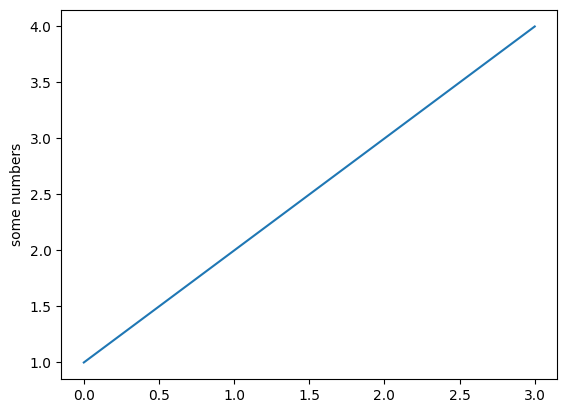

In [14]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

### <font color="magenta">Q1: Where did the numbers on the x-axis come from?</font>

Insert your answer here

To specify x- and y-values:

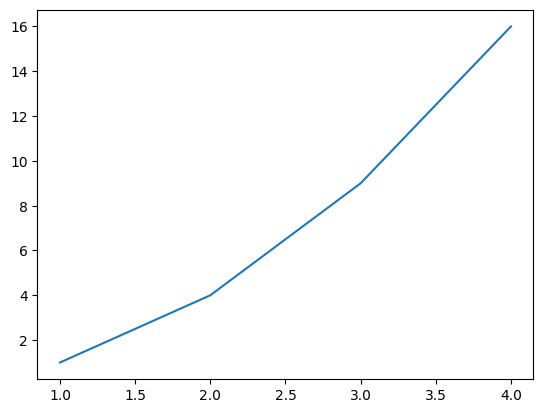

In [15]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

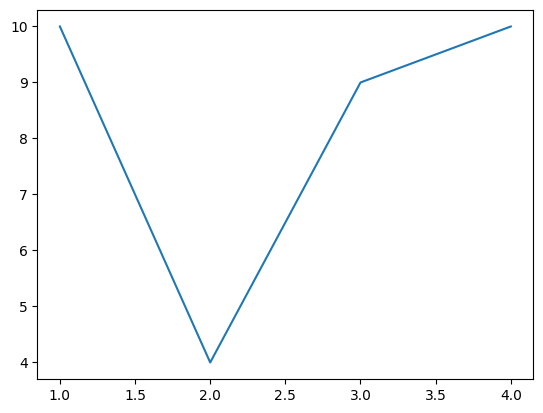

In [16]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [10,4,9,10])
plt.show()

Note default shape is "b-", which means a blue line

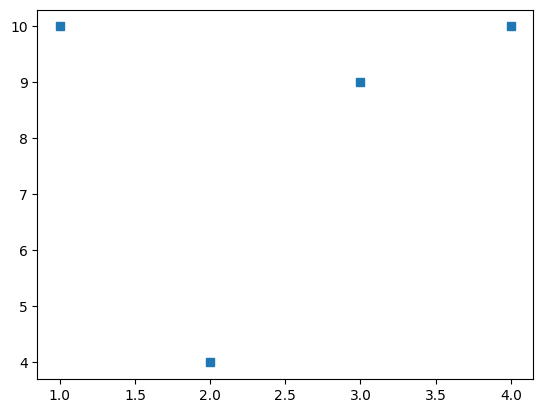

In [17]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [10,4,9,10], 's')
plt.show()

We can explicitly set the bounds for the axes:

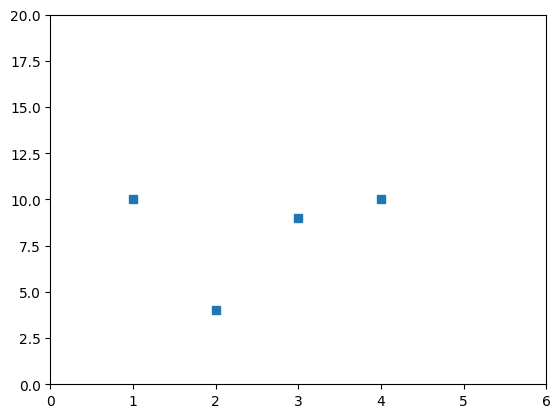

In [18]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [10,4,9,10], 's')
plt.axis([0, 6, 0, 20])
plt.show()

Let's generate some data to play with:

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5.2, 0.2)
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ])

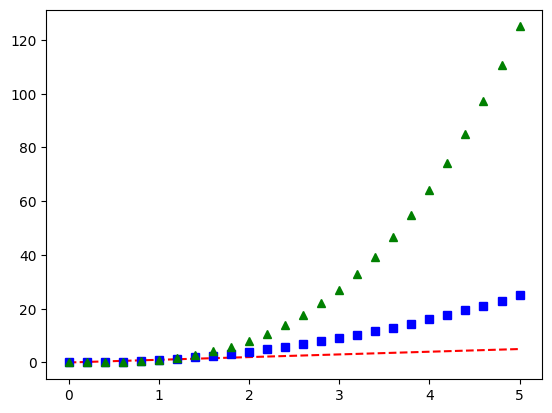

In [20]:
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [21]:
# listing of all marker types
markers = {'.': 'point', ',': 'pixel', 'o': 'circle', 
    'v': 'triangle_down', '^': 'triangle_up', '<': 'triangle_left', '>': 'triangle_right', 
    '1': 'tri_down', '2': 'tri_up', '3': 'tri_left', '4': 'tri_right', '8': 'octagon', 
    's': 'square', 'p': 'pentagon', '*': 'star', 'h': 'hexagon1', 'H': 'hexagon2', '+': 'plus',
    'x': 'x', 'D': 'diamond', 'd': 'thin_diamond', '|': 'vline', '_': 'hline', 
    'P': 'plus_filled', 'X': 'x_filled', 0: 
    'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 
    4: 'caretleft', 5: 'caretright', 6: 'caretup', 7: 'caretdown', 
    8: 'caretleftbase', 9: 'caretrightbase', 10: 'caretupbase', 11: 'caretdownbase', 
    'None': 'nothing', None: 'nothing', ' ': 'nothing', '': 'nothing'}

https://matplotlib.org/3.0.3/api/markers_api.html#module-matplotlib.markers

https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

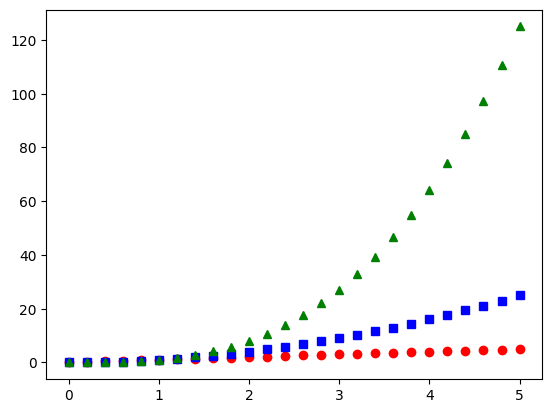

In [22]:
plt.plot(t, t, marker='o', linestyle='', color='r')
plt.plot(t, t**2, marker='s', linestyle='', color='b')
plt.plot(t, t**3, marker='^', linestyle='', color='g')
plt.show()

### <font color="magenta">Q2: Try some other marker styles</font>

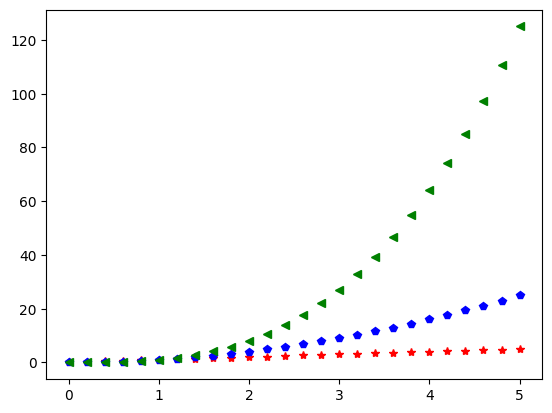

In [23]:
# insert your code here
plt.plot(t, t, marker='*', linestyle='', color='r')
plt.plot(t, t**2, marker='p', linestyle='', color='b')
plt.plot(t, t**3, marker='<', linestyle='', color='g')
plt.show()

## Setting line properties

In [24]:
x, y = [1, 2, 3, 4], [1, 4, 9, 16]

In [25]:
x

[1, 2, 3, 4]

In [26]:
y

[1, 4, 9, 16]

Keyword args:

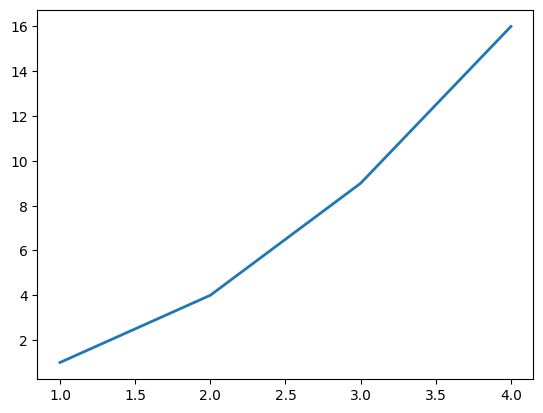

In [27]:
plt.plot(x, y, linewidth=2.0)

setter methods:

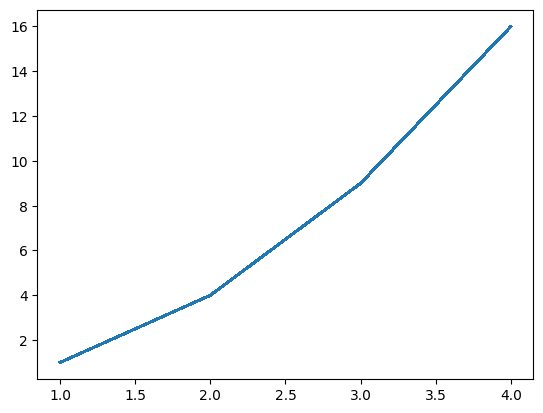

In [28]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False)

```setp()```

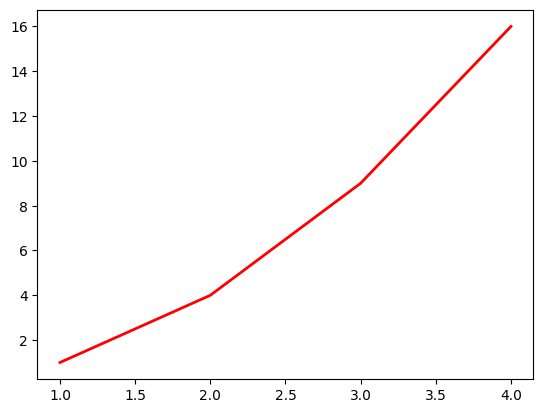

In [29]:
line = plt.plot(x,y)
# use keyword args
plt.setp(line, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(line, 'color', 'r', 'linewidth', 2.0)
plt.show()

## Multiple plots

In [30]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 5.1, 0.1)
t2 = np.arange(0.0, 5.02, 0.02)

In [31]:
t1

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [32]:
t2

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98, 2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18,
       2.2 , 2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 ,
       2.42, 2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62,
       2.64, 2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84,
       2.86, 2.88, 2.9 , 2.92, 2.94, 2.96, 2.98, 3.

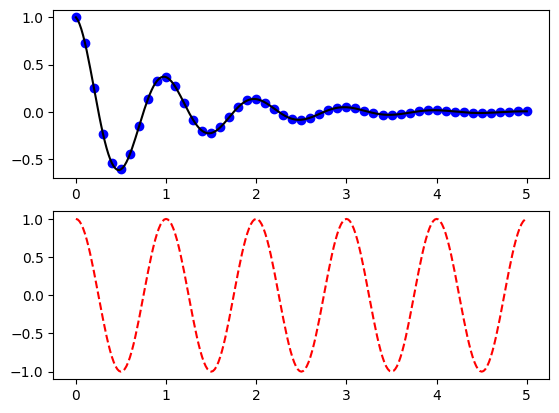

In [33]:
plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

In [34]:
# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

Just a figure and one subplot:

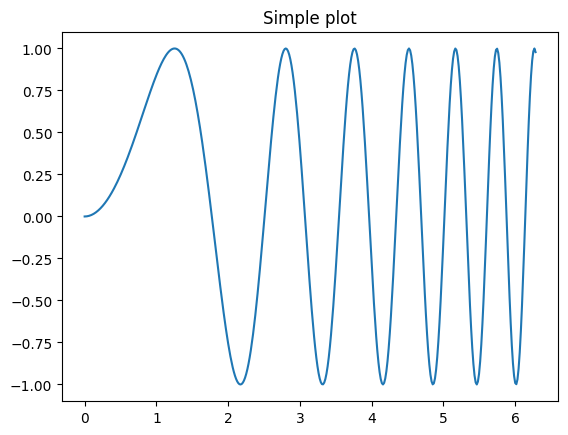

In [35]:
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
plt.show()

Two subplots, the axes array is 1-d

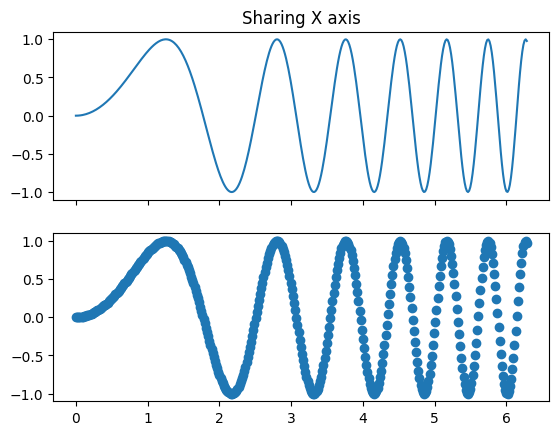

In [36]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)
plt.show()

Two subplots, unpack the axes array immediately


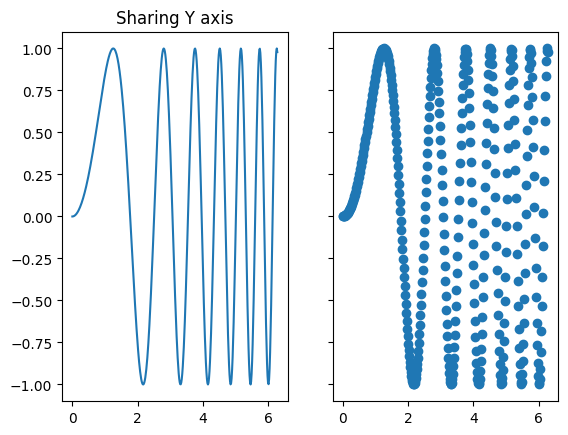

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

Three subplots sharing both x/y axes

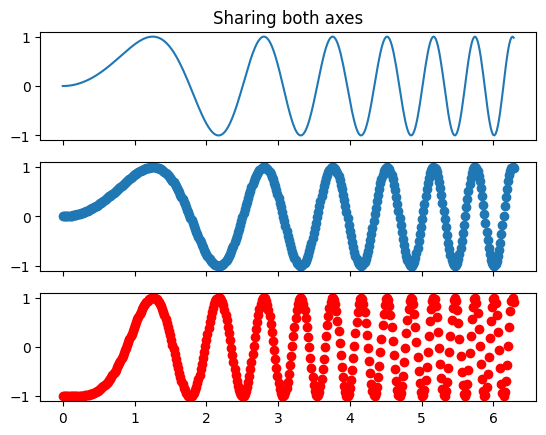

In [38]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
plt.show()

Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.

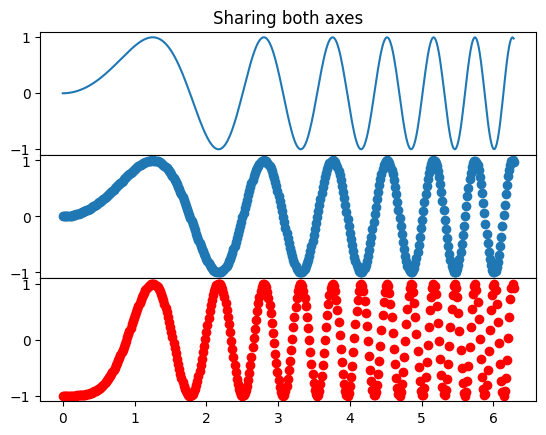

In [39]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()

Row and column sharing:

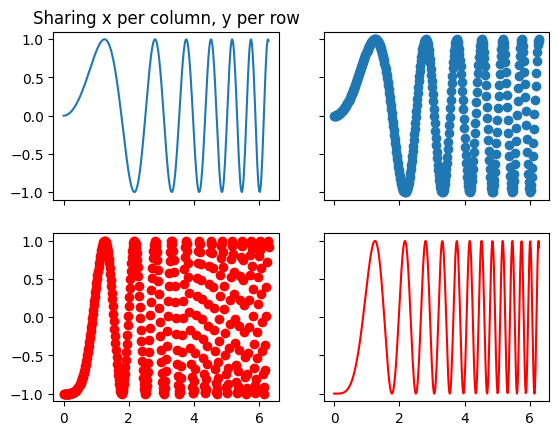

In [40]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')
plt.show()

## Adding Text

In [41]:
# Fixing random state for reproducibility
np.random.seed(618)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

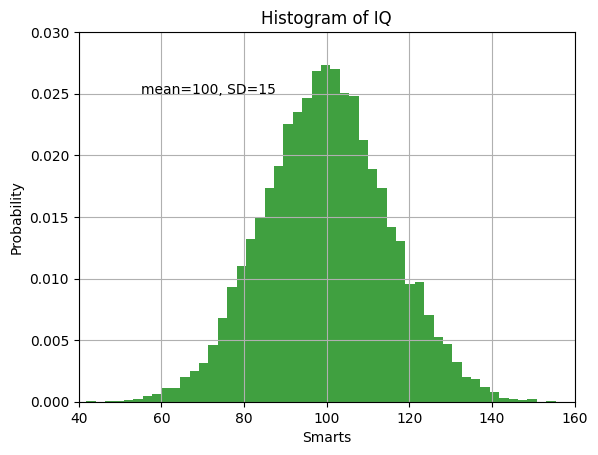

In [42]:
# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(55, .025, 'mean=100, SD=15')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

See also [text properties and layout](https://matplotlib.org/users/text_props.html#text-properties).

## Annotating Text

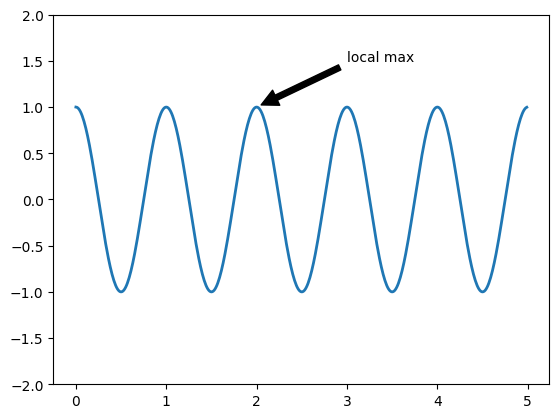

In [43]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max',
             xy=(2, 1),
             xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

### <font color="magenta">Q3: Using the McDonald's menu dataset, plot any 2 continuous variables as a scatterplot and annotate an interesting feature (e.g. local max, outlier, etc.).</font>

In [44]:
menu = pd.read_csv('https://github.com/umsi-data-science/data/raw/main/menu.csv')

In [45]:
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [46]:
menu.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

Text(3000, 1400, "Don't eat this!")

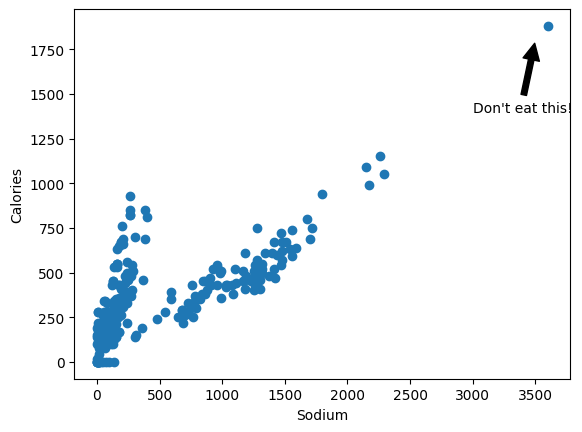

In [47]:
# insert your code here

plt.scatter(menu['Sodium'], menu['Calories'])
plt.xlabel('Sodium')
plt.ylabel('Calories')
plt.annotate("Don't eat this!", xy=(3500, 1800), xytext=(3000, 1400), arrowprops=dict(facecolor='black', shrink=0.05))

## Using specific types of plots via pyplot

In addition to scatterplots, pyplot offers a number of other plot types.  These can be accessed via convenience functions such as ```scatter()```, ```hist()```, ```bar()```, ```barh()```, and ```pie()```, amongst others:

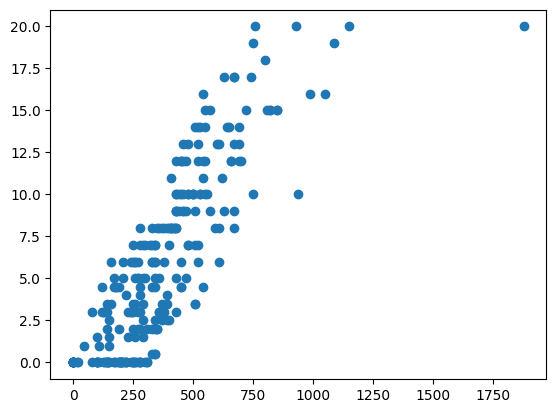

In [48]:
plt.scatter(menu["Calories"], menu["Saturated Fat"])
plt.show()

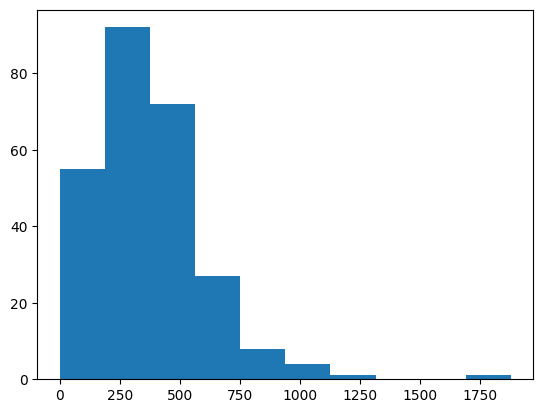

In [49]:
plt.hist(menu['Calories'])
plt.show()

### <font color="magenta">Q4: Create a histogram of any one of the continuous variables from the McDonalds menu dataset.

(array([21., 34., 53., 39., 39., 33., 12., 15.,  5.,  3.,  2.,  2.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   0.,   94.,  188.,  282.,  376.,  470.,  564.,  658.,  752.,
         846.,  940., 1034., 1128., 1222., 1316., 1410., 1504., 1598.,
        1692., 1786., 1880.]),
 <BarContainer object of 20 artists>)

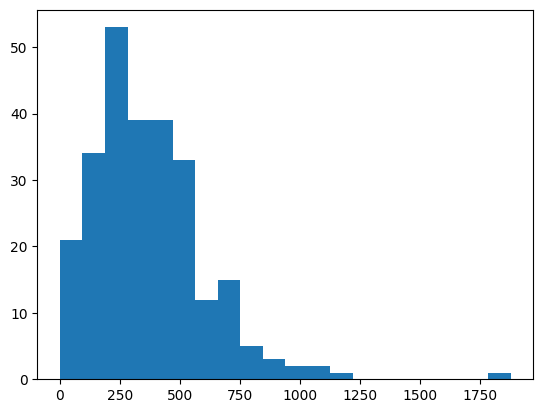

In [50]:
# insert your code here
plt.hist(menu['Calories'], bins=20)
# plt.hist(menu['Calories'])

## Pandas and matplotlib integration

Cumbersome?  Yes.  A better way?  Use the matplotlib integration from pandas:

matplotlib.axes._axes.Axes

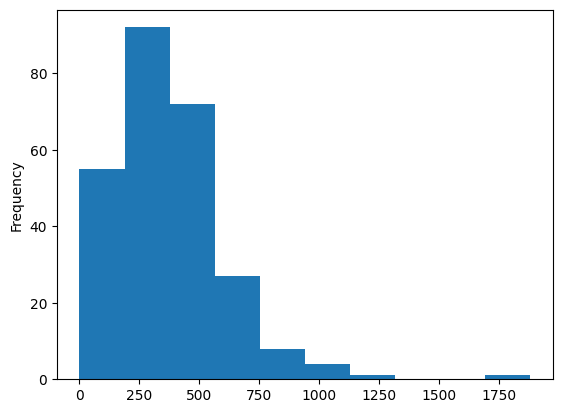

In [51]:
f = menu['Calories'].plot(kind='hist')
type(f)

Here are the valid values for "kind":

kind :
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot

## Bar plots with groupby()

In [52]:
categories = menu.groupby('Category').size()

<Axes: ylabel='Category'>

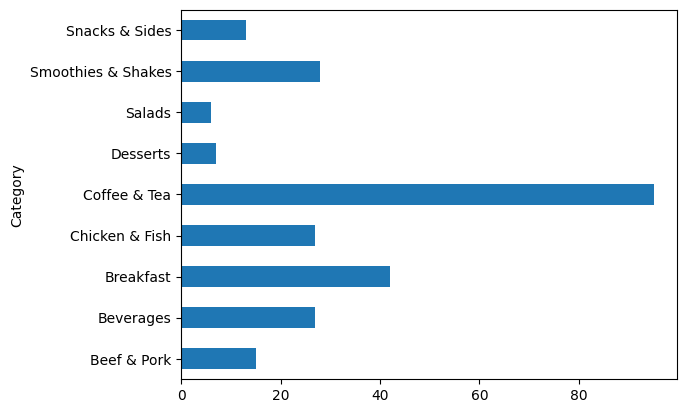

In [53]:
categories.plot(kind='barh')

In [54]:
categories_sorted = categories.sort_values(ascending=True)

<Axes: ylabel='Category'>

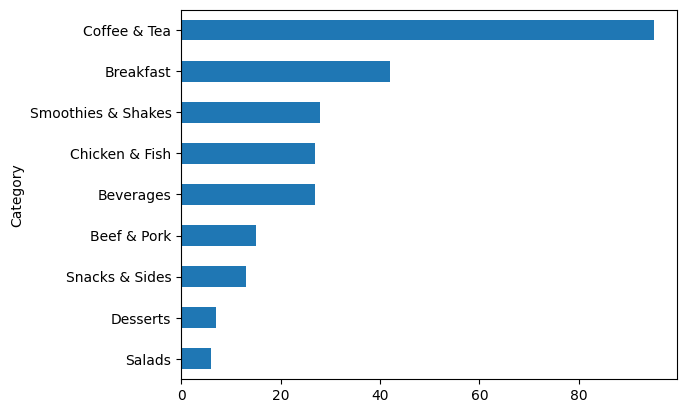

In [55]:
categories_sorted.plot(kind='barh')

### <font color="magenta">Q5: Create a new column in the menu DataFrame called "Sugary" whose value is 1 if the values of "Sugars" is greater than 20, otherwise set it to 0. 

    Hint: use np.where(...) (look it up in the documentation)

In [56]:
# insert your code here
menu['Sugary']=np.where(menu['Sugars'] > 10, 'High', 'Low')

## Create a stacked bar plot by using a 2-level groupby() followed by an unstack():

In [57]:
menu.groupby(["Category", "Sugary"]).size()

Category            Sugary
Beef & Pork         High       3
                    Low       12
Beverages           High      18
                    Low        9
Breakfast           High      14
                    Low       28
Chicken & Fish      High       7
                    Low       20
Coffee & Tea        High      85
                    Low       10
Desserts            High       6
                    Low        1
Salads              High       1
                    Low        5
Smoothies & Shakes  High      28
Snacks & Sides      High       1
                    Low       12
dtype: int64

In [58]:
menu.groupby(["Category", "Sugary"]).size().unstack()

Sugary,High,Low
Category,,
Beef & Pork,3.0,12.0
Beverages,18.0,9.0
Breakfast,14.0,28.0
Chicken & Fish,7.0,20.0
Coffee & Tea,85.0,10.0
Desserts,6.0,1.0
Salads,1.0,5.0
Smoothies & Shakes,28.0,NaN
Snacks & Sides,1.0,12.0


<Axes: xlabel='Category'>

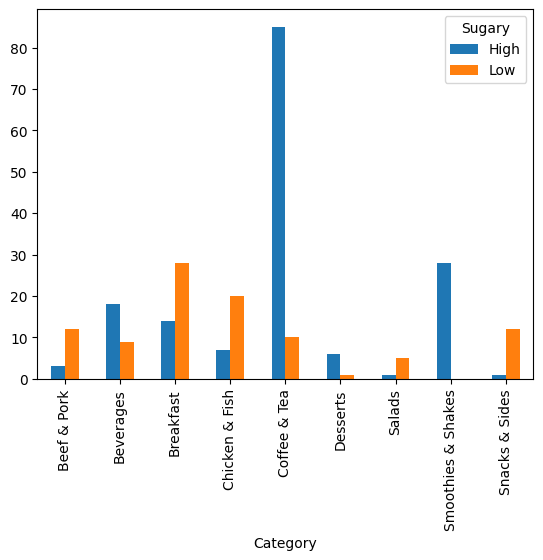

In [59]:
menu.groupby(["Category", "Sugary"]).size().unstack().plot(kind="bar")

<Axes: xlabel='Category'>

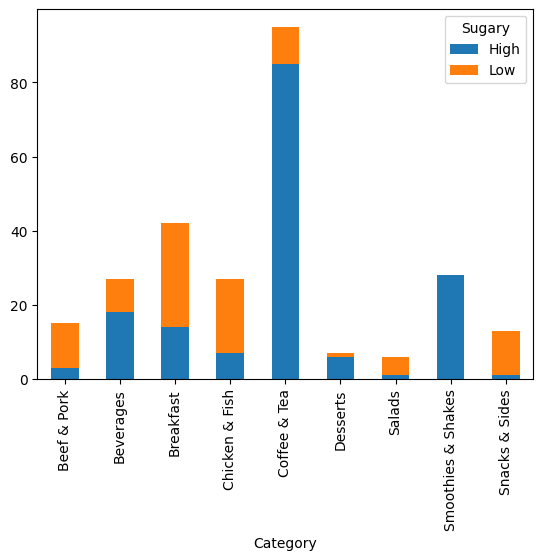

In [60]:
menu.groupby(["Category", "Sugary"]).size().unstack().plot(kind="bar", stacked=True)

<Axes: xlabel='Category'>

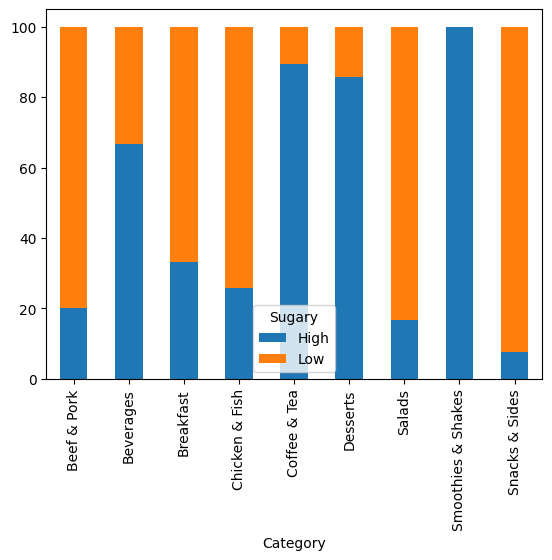

In [61]:
menu.groupby(['Category', 'Sugary']).size().groupby(by='Category', group_keys=False).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', stacked=True)

### <font color="magenta">Q6: Repeat the above steps to generate three bar plots for any other continuous variable that you split into "high" and "low" values, just as with did with "Sugars" above.

In [62]:
# insert your code here
menu.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Sugary'],
      dtype='object')

In [63]:
menu['Protein'].describe()

count    260.000000
mean      13.338462
std       11.426146
min        0.000000
25%        4.000000
50%       12.000000
75%       19.000000
max       87.000000
Name: Protein, dtype: float64

In [64]:
menu['Protein Content']=np.where(menu['Protein'] >= 15, 'High', 'Low')

<Axes: xlabel='Category'>

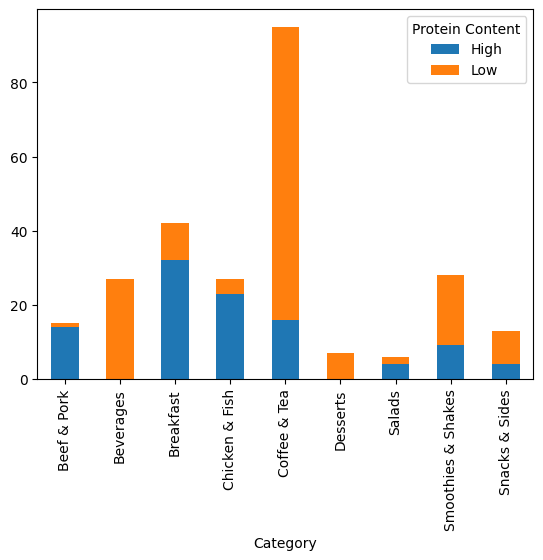

In [65]:
menu.groupby(['Category', 'Protein Content']).size().unstack().plot(kind='bar', stacked=True)

### Pie Charts

There are many issues with pie charts, and the one below is a good example of what not to do, but everyone wants to know how to make them:

<Axes: title={'center': 'Undecipherable Menu Categories'}>

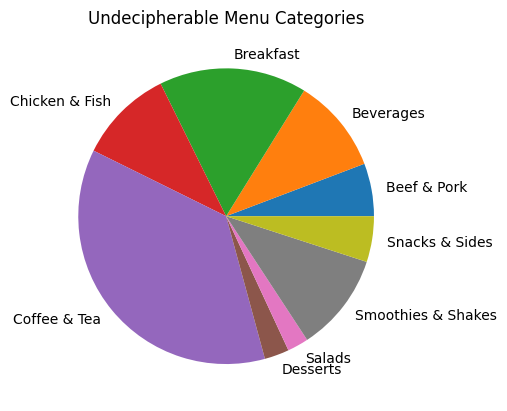

In [66]:
# don't do this...
categories.plot(kind='pie', title='Undecipherable Menu Categories')

### <font color="magenta">Q7: What type of plot can *always* replace a pie chart?

<Axes: xlabel='Category'>

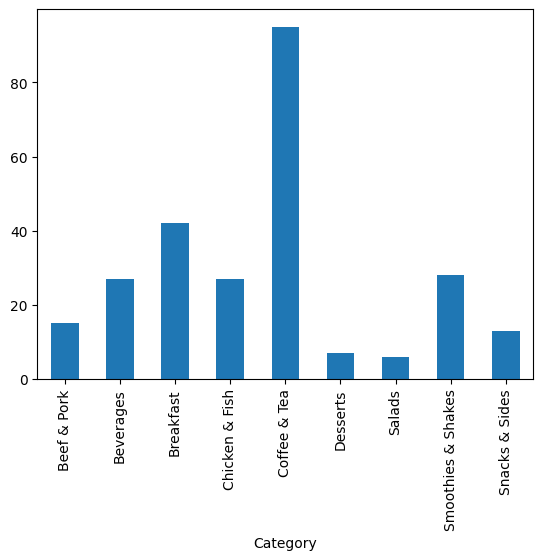

In [67]:
categories.plot(kind='bar')

bar chart

## Subplots (again)

In addition to the way we used subplots in the previous class, we can use the ```.subplots()``` function to generate mulitple plots within a figure.  ```subplots()``` returns a set of axes on which we can make plots.

To demonstrate how this works, let's fill in just one of the subplots:


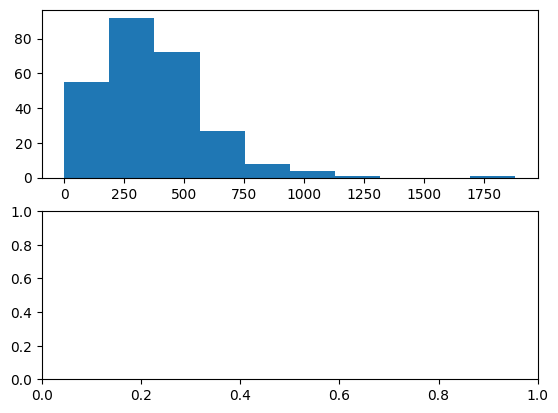

In [68]:
f, (ax1, ax2) = plt.subplots(2)  # if only 1 argument, we assume it's the number of rows
ax1.hist(menu['Calories'])
plt.show()

Now let's fill in both subplots:

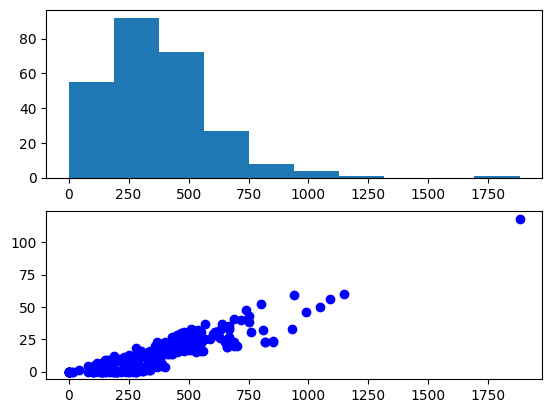

In [69]:
f, (ax1, ax2) = plt.subplots(2)
ax1.hist(menu['Calories'])
ax2.plot(menu['Calories'], menu['Total Fat'], 'bo')
plt.show()

Now let's make a 2x2 layout of 4 plots.  Note the structure of the return values from the subplots function:

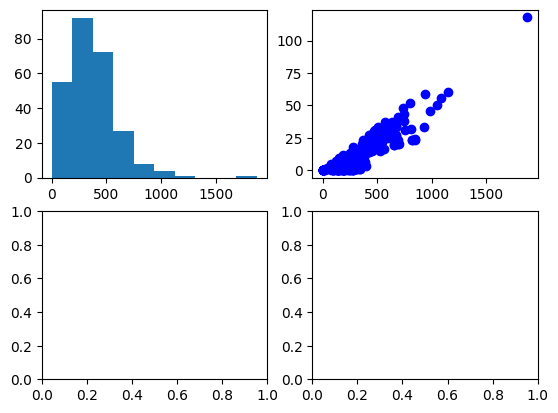

In [70]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.hist(menu['Calories'])
ax2.plot(menu['Calories'], menu['Total Fat'], 'bo')
plt.show()

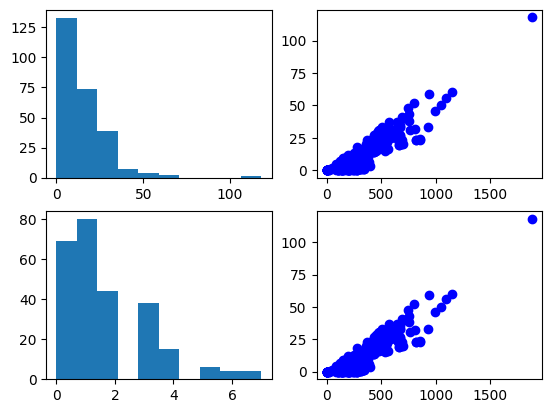

In [71]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.hist(menu['Total Fat'])
ax2.plot(menu['Calories'], menu['Total Fat'], 'bo')
ax3.hist(menu['Dietary Fiber'])
ax4.plot(menu['Calories'], menu['Total Fat'], 'bo')
plt.show()

Alternatively, we can use the pandas-matplotlib integration.  Note the use of the ```ax=``` keyword arg.

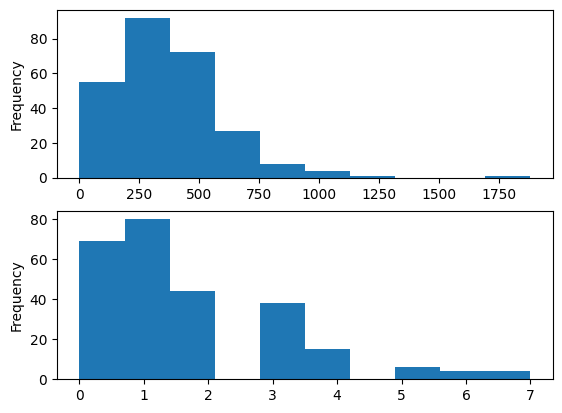

In [72]:
f, (ax1, ax2) = plt.subplots(2)
menu['Calories'].plot(ax=ax1, kind='hist')
menu['Dietary Fiber'].plot(ax=ax2, kind='hist')
plt.show()

### <font color="magenta">Q8: Use subplots() to create a figure consisting of 4 plots.

They could be scatter plots, histograms, bar charts, pie plots, or any of the kinds (repeated here for your convenience):
    
    kind :
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot

In [73]:
# insert your code here

# BREAK

## Simple (univariate) statistics

In [74]:
# The weights of a herd of 80 cows
# Fixing random state for reproducibility
np.random.seed(618)

measures = (np.random.standard_normal(80)*150+1000).astype(int)
measures

array([1167, 1075,  893, 1066, 1025, 1084,  665, 1021, 1085,  886, 1161,
        959, 1008, 1004,  953, 1050, 1091,  857,  881,  891, 1048, 1213,
       1094, 1031,  935, 1014, 1054,  933, 1053, 1026,  844,  996, 1115,
        836,  884,  901,  801, 1226, 1091, 1448, 1119, 1215, 1199, 1030,
       1163,  987,  925, 1127, 1108, 1146, 1400,  984, 1035,  841, 1015,
        922, 1042, 1026,  888,  987,  933,  850, 1237, 1018,  955, 1308,
        817, 1146, 1022,  884, 1200,  979,  787, 1056, 1105, 1101, 1054,
       1285,  770,  710])

In [75]:
# equivalently
# Fixing random state for reproducibility
np.random.seed(618)

measures = (np.random.normal(1000,150,80)).astype(int)
measures

array([1167, 1075,  893, 1066, 1025, 1084,  665, 1021, 1085,  886, 1161,
        959, 1008, 1004,  953, 1050, 1091,  857,  881,  891, 1048, 1213,
       1094, 1031,  935, 1014, 1054,  933, 1053, 1026,  844,  996, 1115,
        836,  884,  901,  801, 1226, 1091, 1448, 1119, 1215, 1199, 1030,
       1163,  987,  925, 1127, 1108, 1146, 1400,  984, 1035,  841, 1015,
        922, 1042, 1026,  888,  987,  933,  850, 1237, 1018,  955, 1308,
        817, 1146, 1022,  884, 1200,  979,  787, 1056, 1105, 1101, 1054,
       1285,  770,  710])

### Exercise 9:
Calculate some summary statistics for the `measures` variable you just created.

In [76]:
# insert your code here
pd.Series(measures).describe()

count      80.000000
mean     1021.762500
std       145.408481
min       665.000000
25%       924.250000
50%      1025.500000
75%      1102.000000
max      1448.000000
dtype: float64

## Visualizing data with Seaborn
* Visualization package built on top of matplotlib
* It's meant to make your life better
* Plays well with pandas, numpy, scipy, and statsmodels
* Many different visualization are included:
 * Strip plots, Swarm plots, Violin plots
 * Box plots
 * Histograms
 
 We need to import the package, and it's typically imported as sns:
 
 ```
 import seaborn as sns
 ``` 


[seaborn.pydata.org](http://seaborn.pydata.org)

## Seaborn versus Matplotlib
* Matplotlib
     * Low-level, basis for many packages
     * Painful to construct certain graphs
     * Not Pandas friendly
     * Not interactive
* Seaborn
     * Pandas friendlier
     * Great for some stats plots


In [77]:
import seaborn as sns

## Strip Plot

<Axes: >

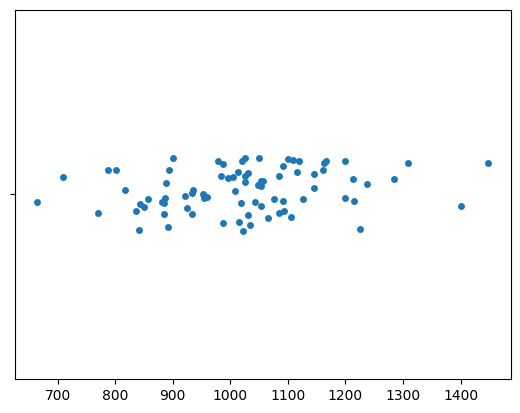

In [78]:
sns.stripplot(x=measures)

## Swarm Plot

<Axes: >

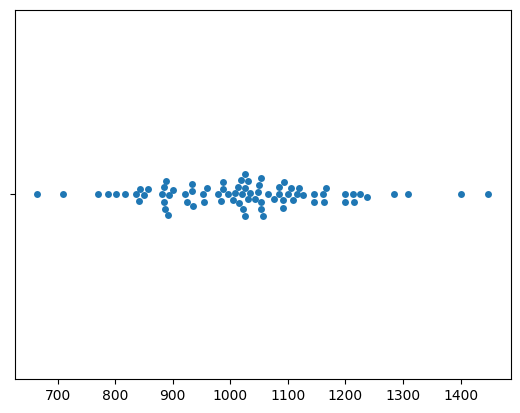

In [79]:
sns.swarmplot(x=measures)

## Violin Plot
* If we have too much data

<Axes: >

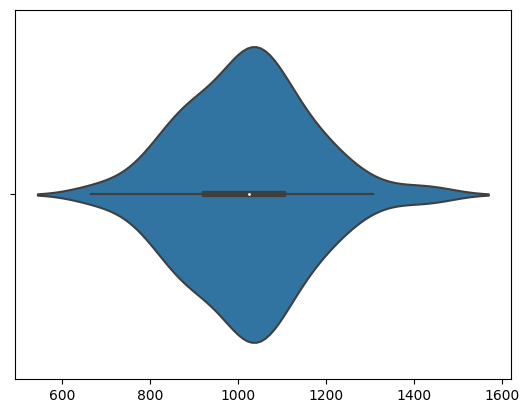

In [80]:
sns.violinplot(x=measures)

## Box Plot

<Axes: >

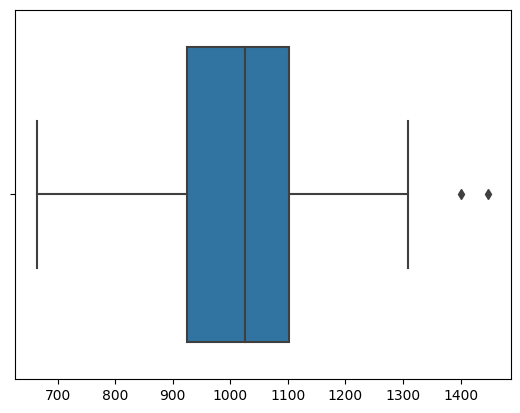

In [81]:
sns.boxplot(x=measures)

And we can manipulate the underlying plot to control different features.  See 
https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python#34162641
and
https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots for explanations about ```plt.subplots()```



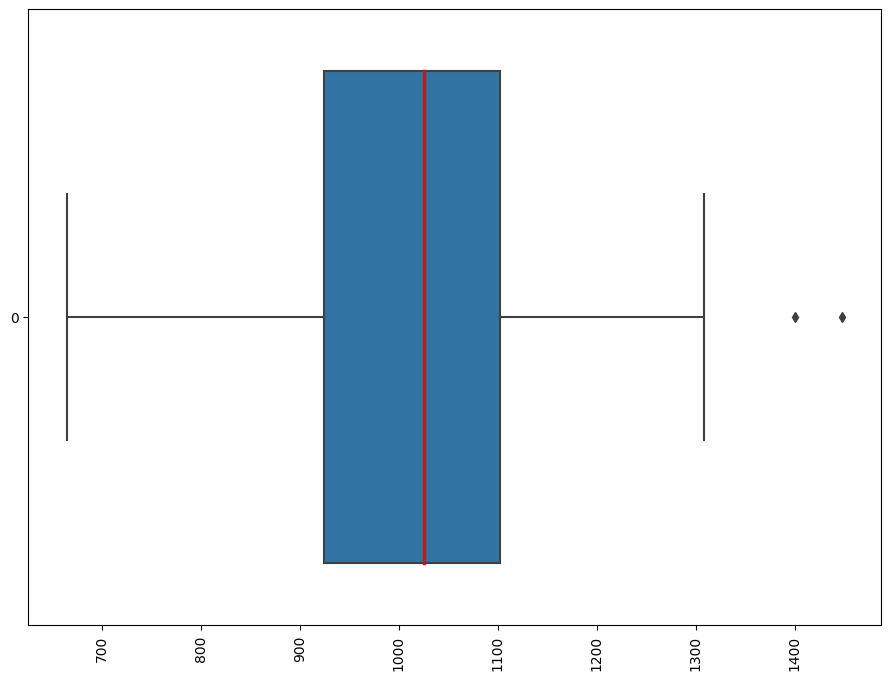

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
medianprops = dict(linewidth=2.5, color='firebrick')
sns.boxplot(medianprops=medianprops, data=measures, orient='h')
_ = plt.xticks(rotation=90)

## Histogram

We're going to use this a lot.  Seaborn puts a nice smooth line over a distribution.  We'll talk about that soon, but for now just think about it as an extrapolation:  if we had a bunch more data, the distribution would eventually smooth out to something that looks like the line.

<Axes: ylabel='Count'>

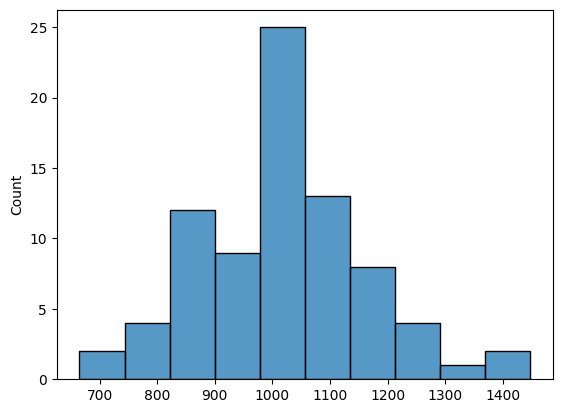

In [83]:
# x axis = value, y axis = count (frequency)
sns.histplot(measures, kde=False)

/Users/luyan/Documents/UM/23Fall/si618/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


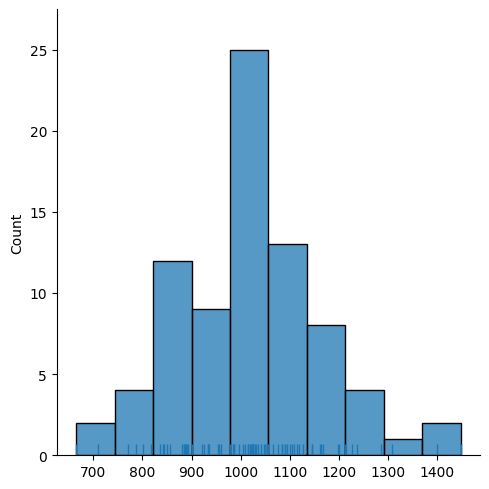

In [84]:
# note use of displot rather than histplot
sns.displot(measures, rug=True); # show a strip plot on bottom -- we call it a "rug"


## Visualizing the menu data using Seaborn

<Axes: xlabel='Calories', ylabel='Count'>

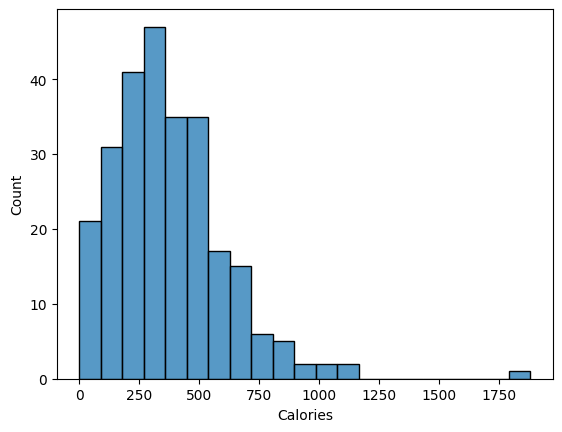

In [85]:
sns.histplot(menu.Calories)

<Axes: xlabel='Total Fat', ylabel='Count'>

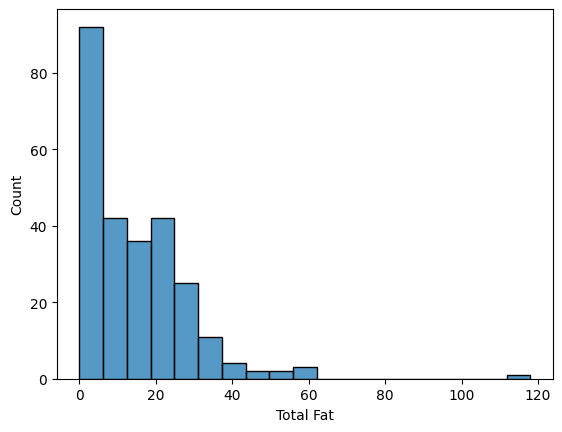

In [86]:
sns.histplot(menu['Total Fat'])

/Users/luyan/Documents/UM/23Fall/si618/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


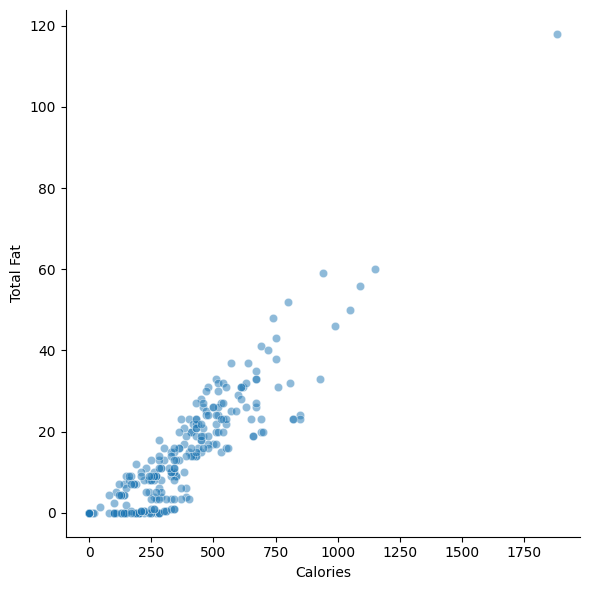

In [87]:
# Relationship between petal_width & petal_length by species
sns.relplot(x="Calories", y="Total Fat",# hue="Category",
            sizes=(40, 400), alpha=.5, 
            height=6, data=menu)

/Users/luyan/Documents/UM/23Fall/si618/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


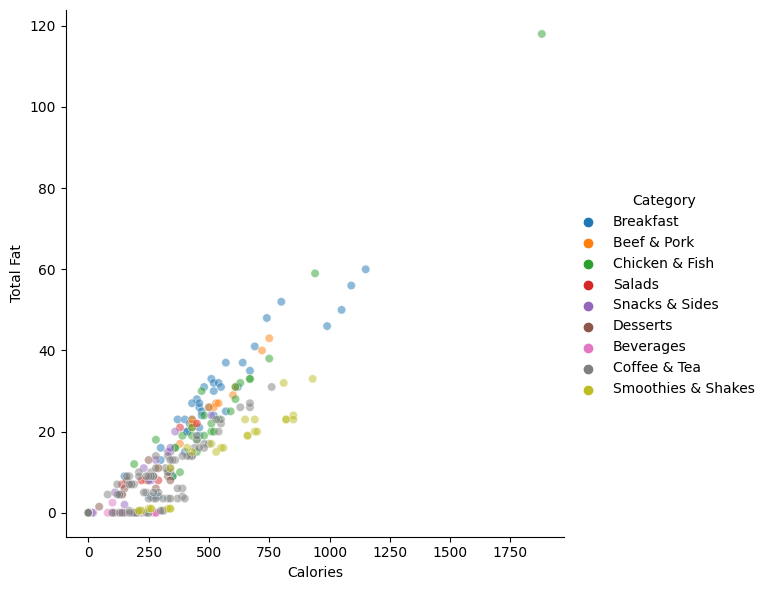

In [88]:
# Relationship between petal_width & petal_length by species
sns.relplot(x="Calories", y="Total Fat",hue="Category",
            sizes=(40, 400), alpha=.5, 
            height=6, data=menu)

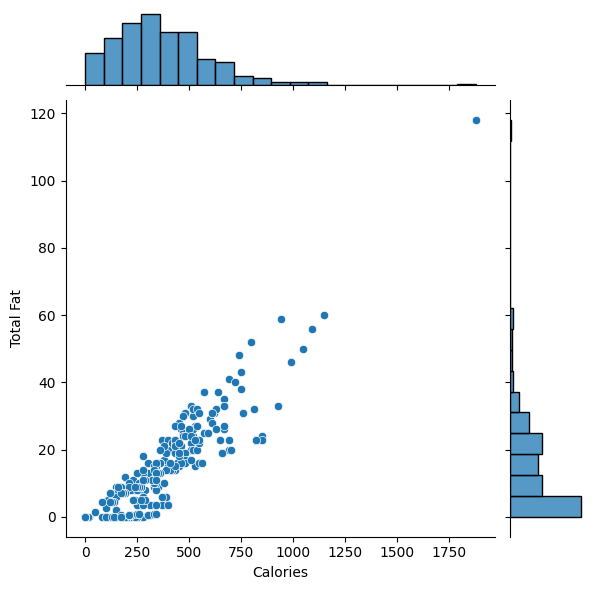

In [89]:
sns.jointplot(x='Calories', y='Total Fat', data=menu)

It's a bit difficult to see where the interesting areas in the plot are, so it's worth trying a hexbin plot.  Go ahead and copy the above  code block and add ```kind="hex"``` to the jointplot parameters. 

In [90]:
# insert your code here

Finally, you may want to look at all the numeric variables in your
dataset. Use ```pairplot``` to do this:


/Users/luyan/Documents/UM/23Fall/si618/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


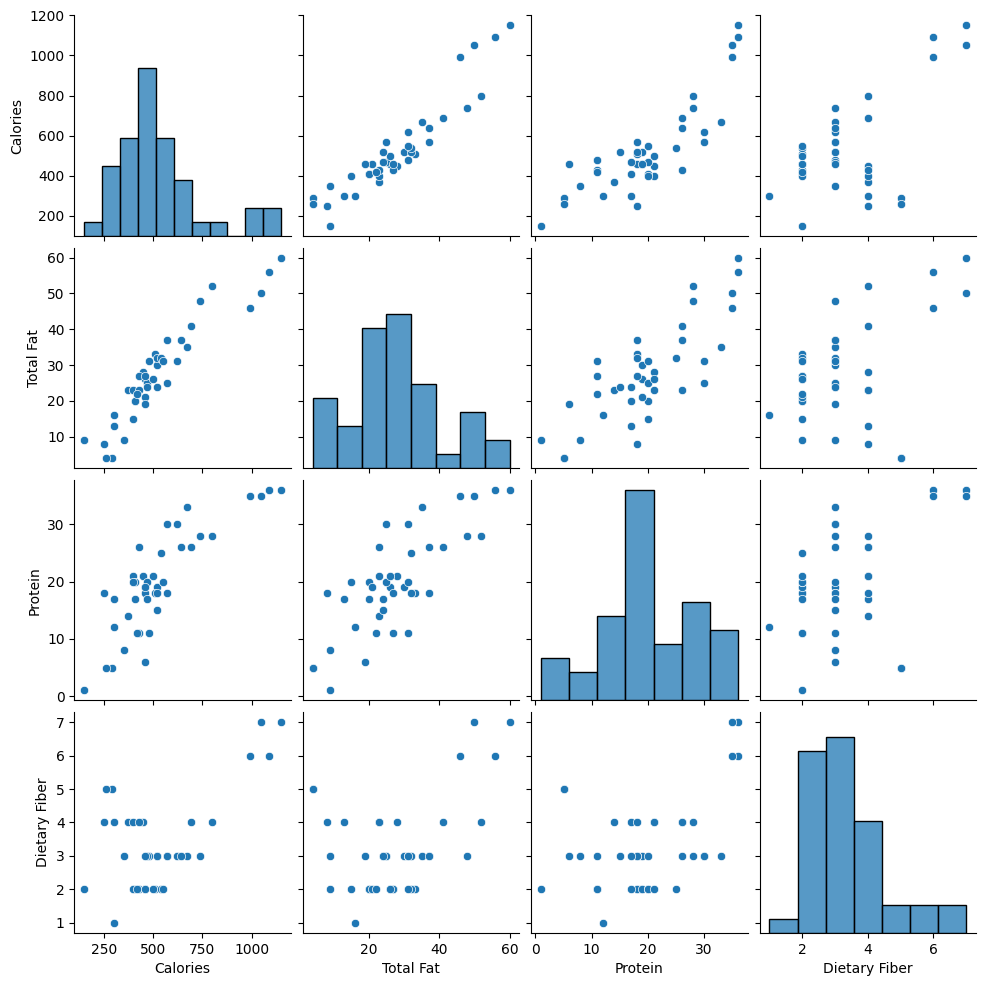

In [91]:
sns.pairplot(menu.query("Category == 'Breakfast'"),
             vars=['Calories', 'Total Fat', 'Protein', 'Dietary Fiber'])

We can get fancier by using a different column to set the color (or "hue"):

Try running the following code:

/Users/luyan/Documents/UM/23Fall/si618/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


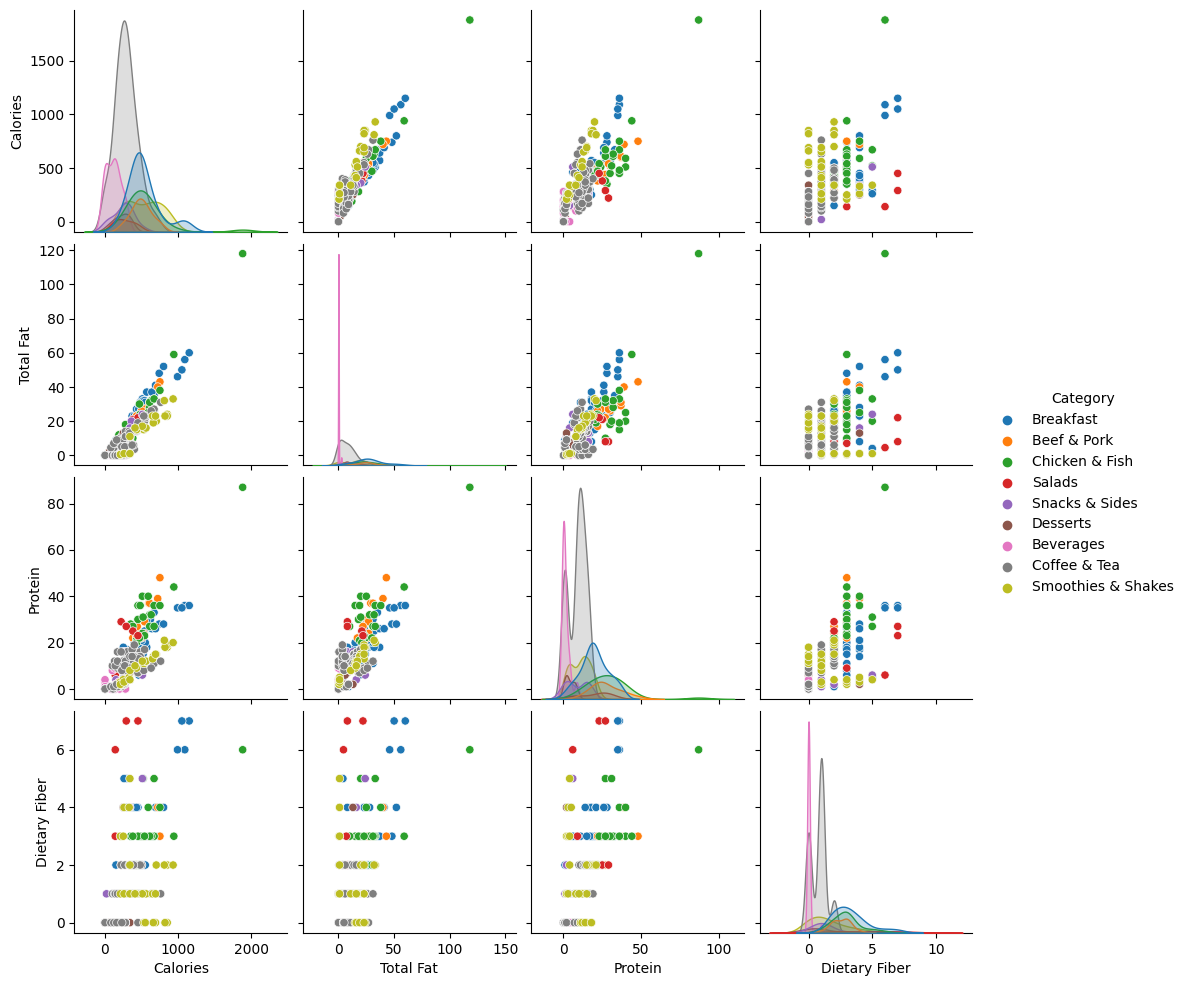

In [92]:
sns.pairplot(data=menu,
             hue="Category",
             vars=['Calories', 'Total Fat', 'Protein', 'Dietary Fiber'])

## Why do we care about distributions?
## World is not normal
* Many other kinds of distributions
* We can tell what they are by looking at distribution

## Uniform

/Users/luyan/Documents/UM/23Fall/si618/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


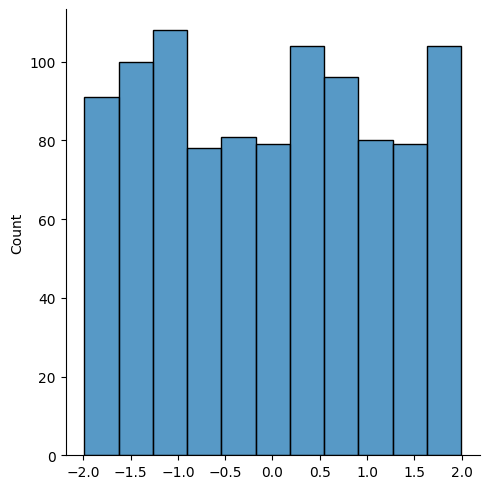

In [93]:
uniform = np.random.uniform(-2, 2, 1000)  # low,high,count
sns.displot(uniform, kde=False)

## Bimodal

/Users/luyan/Documents/UM/23Fall/si618/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


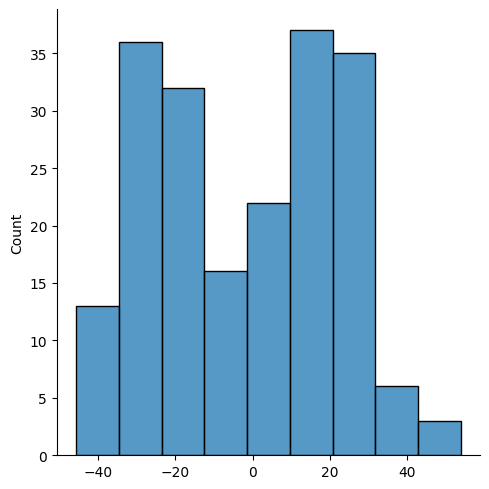

In [94]:
bimodal = np.append(np.random.normal(-20, 10, 100),
                    np.random.normal(20, 10, 100))
sns.displot(bimodal)

# Poisson

$$ P(k~events~in~interval) = \frac{\lambda^ke^{-\lambda}}{k!} $$

$\lambda$ is the event rate

Examples
* Meteor strikes
* Arrival of patients to hospital

/Users/luyan/Documents/UM/23Fall/si618/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


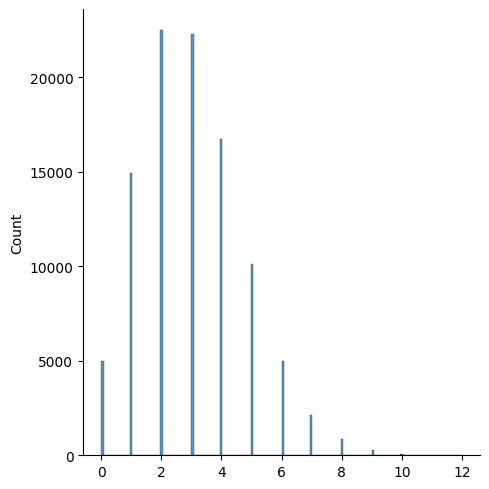

In [95]:
# as lambda goes up --> looks more normal
pois = np.random.poisson(3, 100000) # lambda, count 
sns.displot(pois)

# Power/Zipf/Pareto

$$ P = \frac{x^{-a}}{\zeta(a)}$$

"long tail"
* degree distribution
* movie/music popularity
* words


/Users/luyan/Documents/UM/23Fall/si618/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


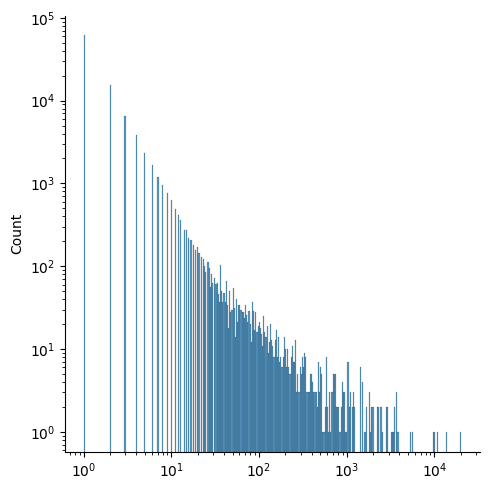

In [96]:
power = np.random.zipf(2, 100000)
sns.displot(power, log_scale=(True, True))

## Visual Tests on Data

<Axes: ylabel='Count'>

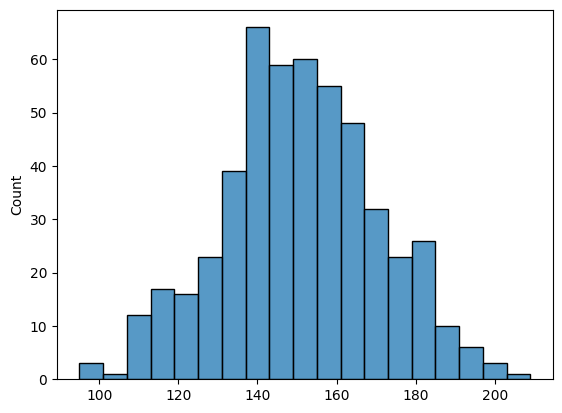

In [97]:
testdata = (np.random.standard_normal(500)*20+150).astype(int)
sns.histplot(testdata)

## Run Sequence
* Run Sequence (index versus value)
* flat and non-drifting
 * fixed-location assumption holds
* vertical spread same over the entire plot, 
 * then the fixed-variation assumption holds.

Text(0.5, 0, 'i')

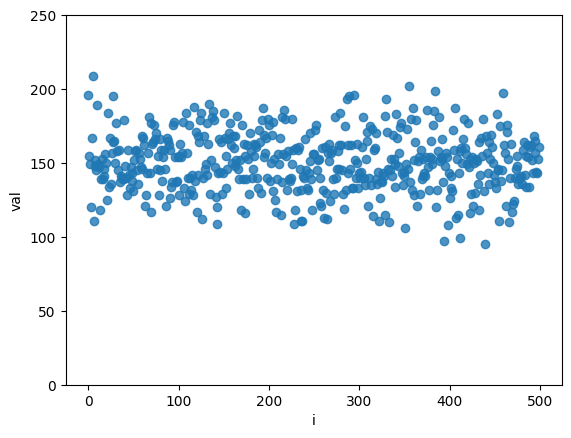

In [98]:
ax = sns.regplot(x=np.arange(len(testdata)), y=testdata, fit_reg=False)
ax.set_ylim(0, 250)
ax.set_ylabel("val")
ax.set_xlabel("i")

<Axes: ylabel='Count'>

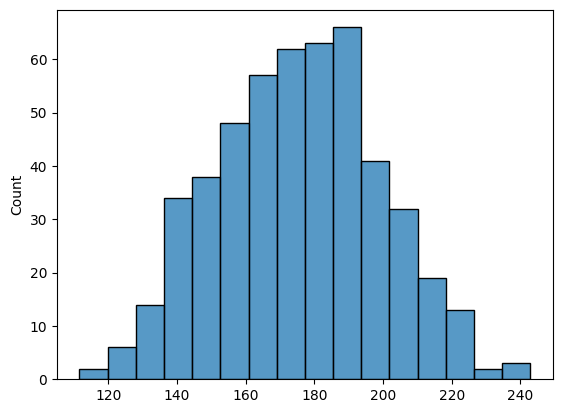

In [99]:
drifting = np.array([testdata[i]+i*(.1) for i in np.arange(len(testdata))])
sns.histplot(data=drifting, kde=False)

Text(0.5, 0, 'i')

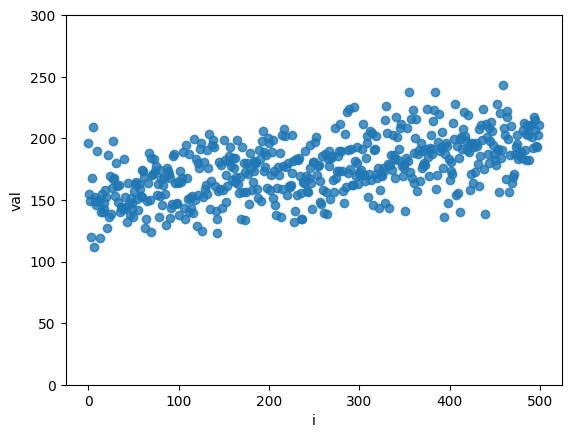

In [100]:
ax = sns.regplot(x=np.arange(len(drifting)), y=drifting, fit_reg=False)
ax.set_ylim(0, 300)
ax.set_ylabel("val")
ax.set_xlabel("i")

<Axes: ylabel='Count'>

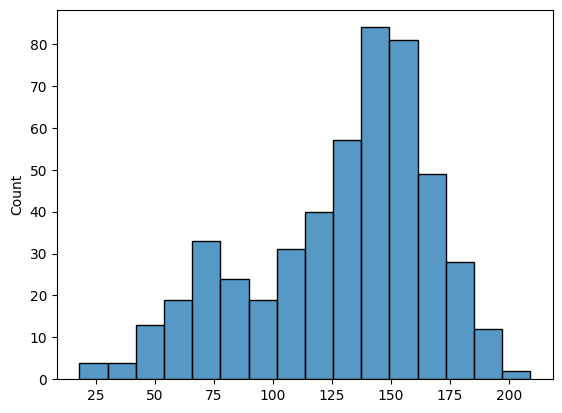

In [101]:
expanding = np.array([(testdata[i]+i*np.random.randint(-1,1)*.2)
                     for i in np.arange(len(testdata))])
sns.histplot(expanding)

Text(0.5, 0, 'i')

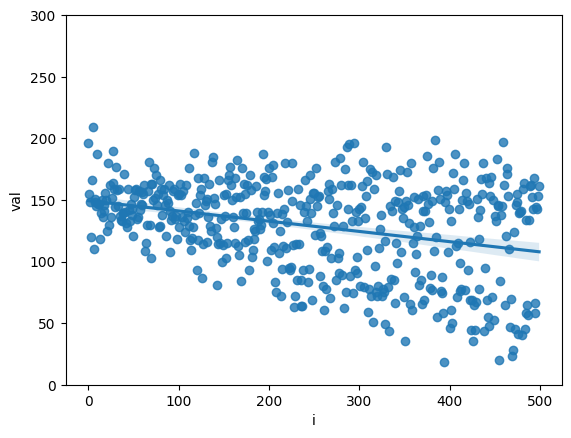

In [102]:
ax = sns.regplot(x=np.arange(len(expanding)), y=expanding)
ax.set_ylim(0, 300)
ax.set_ylabel("val")
ax.set_xlabel("i")

# Lag Plot

* Plot point $y_i$ versus $y_{i-1}$
* If the lag plot is structureless
 * randomness assumption holds.

Text(0.5, 0, 'y_i')

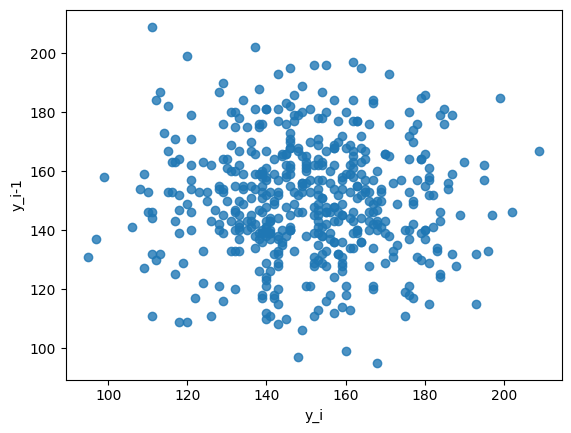

In [103]:
lag = testdata.copy()
lag = np.array(lag[:-1])
current = testdata[1:]
ax = sns.regplot(x=current, y=lag, fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

<Axes: ylabel='Count'>

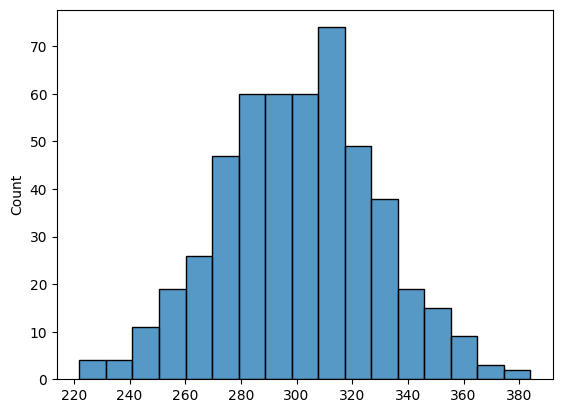

In [104]:
connected = np.array([testdata[i]+testdata[i-1] for i in np.arange(500)])
sns.histplot(connected)

Text(0.5, 0, 'y_i')

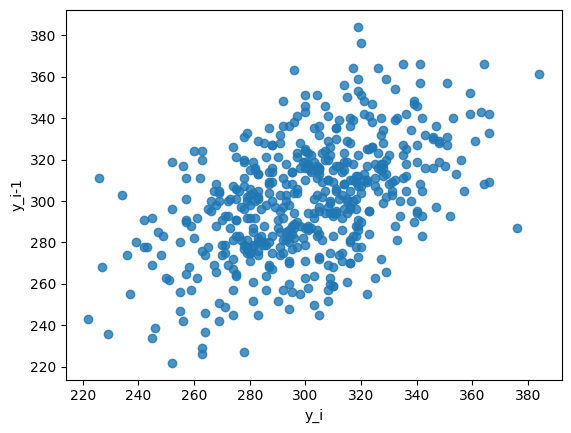

In [105]:
lag = connected.copy()
lag = np.array(lag[:-1])
current = connected[1:]
ax = sns.regplot(x=current, y=lag, fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

## QQ Plot
* QQ Plots takes our n ordered data points
 * sorted from smallest to largest
* Asks:
 * What is the relationship between quantiles from our data and quantiles from a theoretical distribution that we're assuming the sample is drawn from

In [106]:
from scipy import stats

<Axes: >

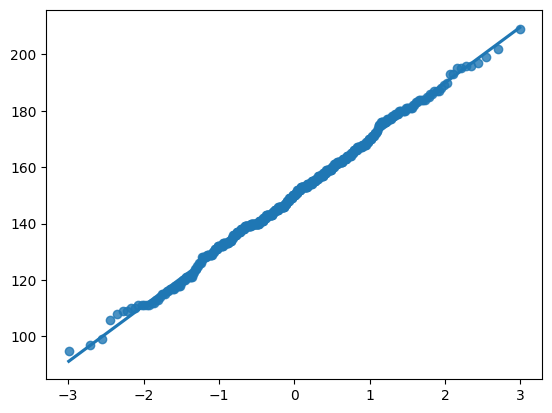

In [107]:
qntls, xr = stats.probplot(testdata, fit=False)
sns.regplot(y=xr, x=qntls)

In [108]:
def random_snorm(n, mean = 0, sd = 1, xi = 1.5):
    def random_snorm_aux(n, xi):
        weight = xi/(xi + 1/xi)
        z = np.random.uniform(-weight,1-weight,n)
        xi_ = xi**np.sign(z)
        random = -np.absolute(np.random.normal(0,1,n))/xi_ * np.sign(z)
        m1 = 2/np.sqrt(2 * np.pi)
        mu = m1 * (xi - 1/xi)
        sigma = np.sqrt((1 - m1**2) * (xi**2 + 1/xi**2) + 2 * m1**2 - 1)
        return (random - mu)/sigma

    return random_snorm_aux(n, xi) * sd + mean

<Axes: ylabel='Count'>

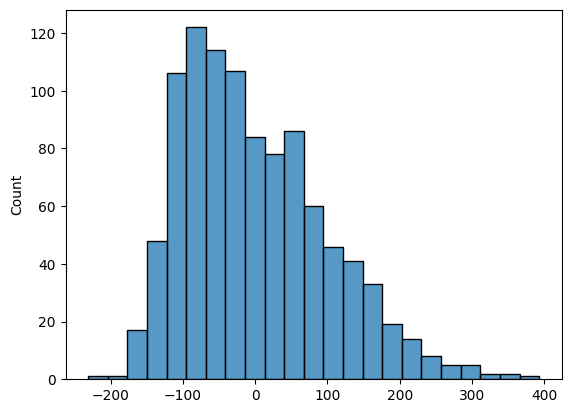

In [109]:
rightskewed = random_snorm(1000, xi=2)*100
sns.histplot(rightskewed, kde=False)

<Axes: >

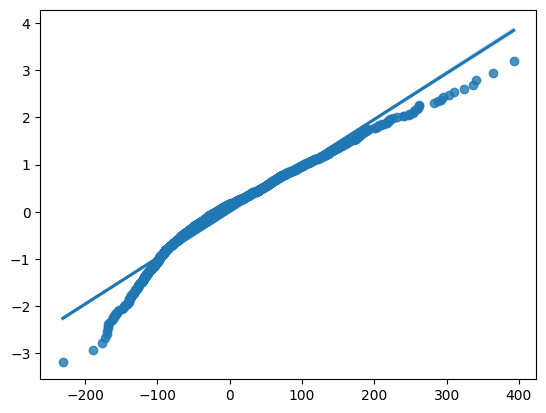

In [110]:
qntls, xr = stats.probplot(rightskewed, fit=False)
sns.regplot(x=xr, y=qntls)

<Axes: ylabel='Count'>

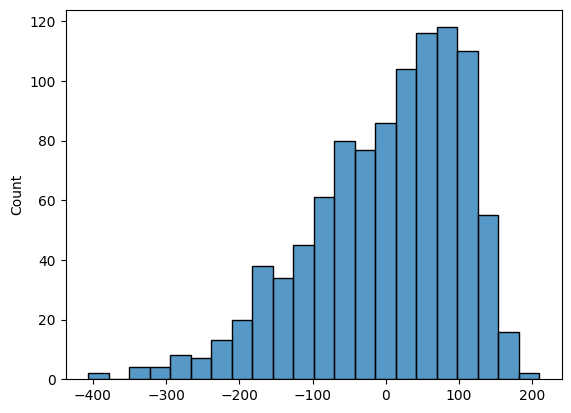

In [111]:
leftskewed = random_snorm(1000, xi=-2)*100
sns.histplot(leftskewed, kde=False)

<Axes: >

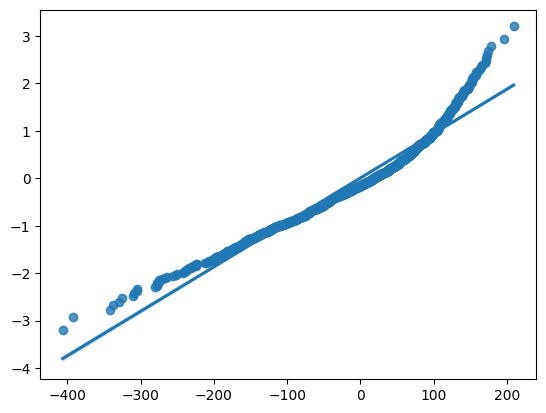

In [112]:
qntls, xr = stats.probplot(leftskewed, fit=False)
sns.regplot(x=xr, y=qntls)

## Now the serious plots... let's wrap them in a single function that we can call

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [114]:
def multiplePlots(series):

    fig, axs = plt.subplots(2, 2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)

    # Histogram
    sns.histplot(series, ax=axs[0, 0])

    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(x=current, y=lag, fit_reg=False, ax=axs[0, 1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")

    # QQ plot (updated 2023.08.18.1.CT to match usual QQ plot -- axes flipped)
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(y=xr, x=qntls, ax=axs[1, 0])

    # Run sequence
    ax = sns.regplot(x=np.arange(len(series)), y=series, ax=axs[1, 1])
    ax.set_ylabel("val")
    ax.set_xlabel("i")

## Now run this on `measures`

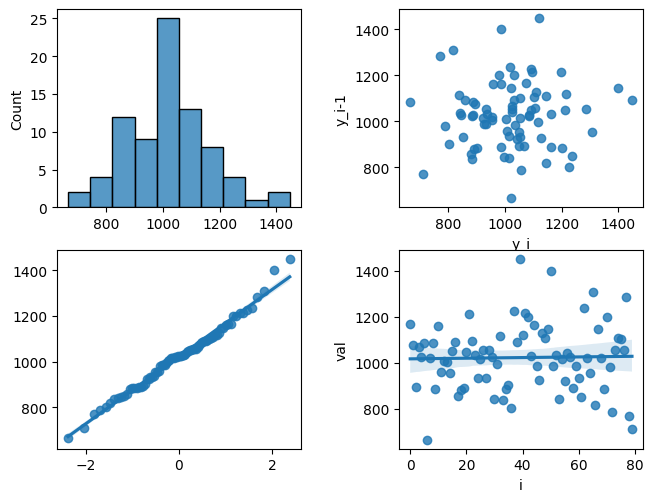

In [115]:
multiplePlots(measures)

### <font color="magenta">Q12: <a href="https://www.theguardian.com/news/datablog/2010/jul/16/data-plural-singular">Do your data look</a> normally distributed?</font>
Yes. In the bar chart, the points distributed normally around the mean and the deviation is quite symmetry. Also, in Rag, QQ and Run plot, the points are also well distributed 

### <font color="magenta">Q13: </font>
The sample.csv file, loaded for you in the next cell, contains 9 variables (v0 through v8) that contain
measures drawn from different distributions.
Your task is to use the investigative techniques we discussed in today's lab to determine
what type of distribution the sample is drawn from.

You should first load the CSV file into a DataFrame, then look at various aspects of **each** variable.

**Your responses should consist of code cells, as well as markdown cells that state something like:**
> Variable v99 appears to be drawn from a uniform distribution with mean X and standard deviation Y.  
> A histogram of the data appears to be...
> The QQ plot shows.... 
>

Note: try not to repeat your code.  You can use loops, functions, etc. to avoid repeating yourself. (remember, [DRY](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself)).


In [116]:
distributions = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/sample.csv')

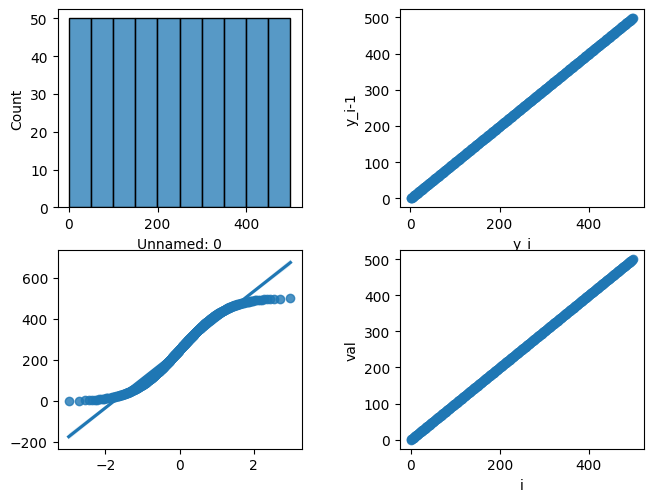

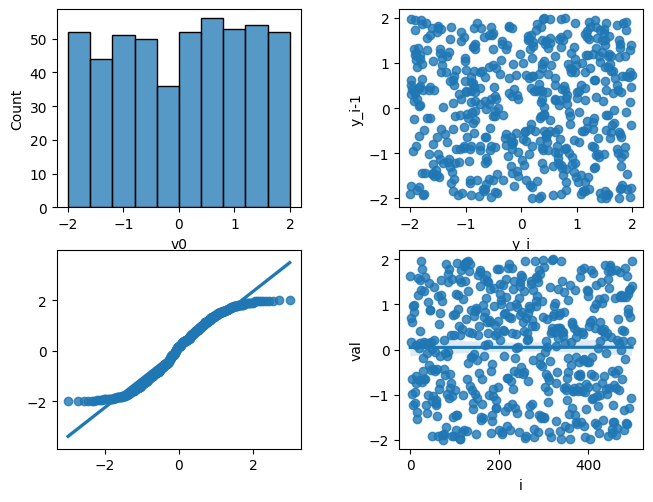

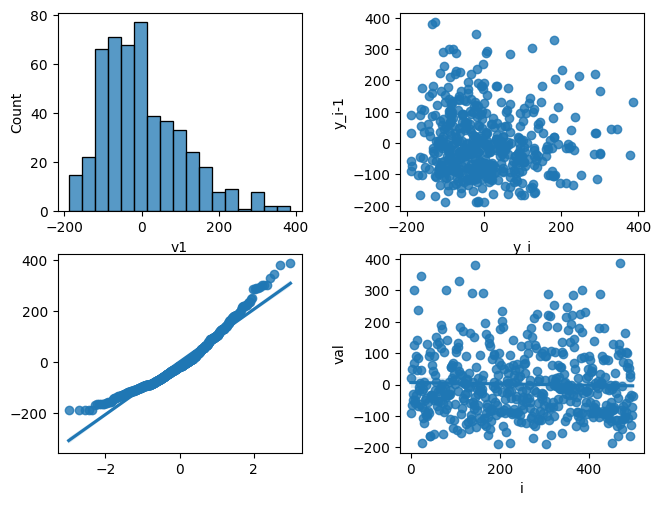

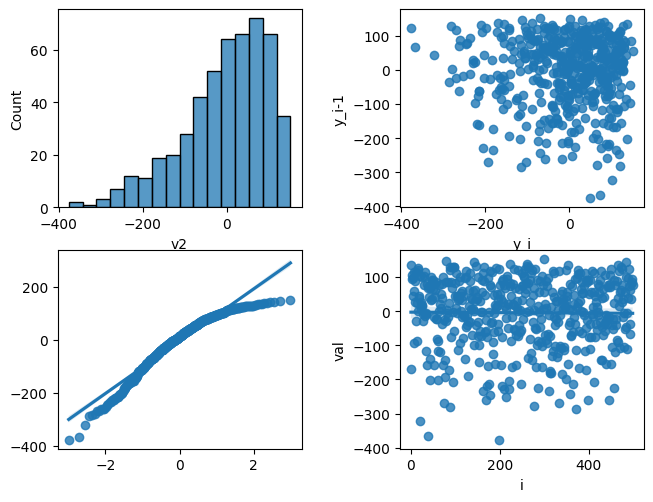

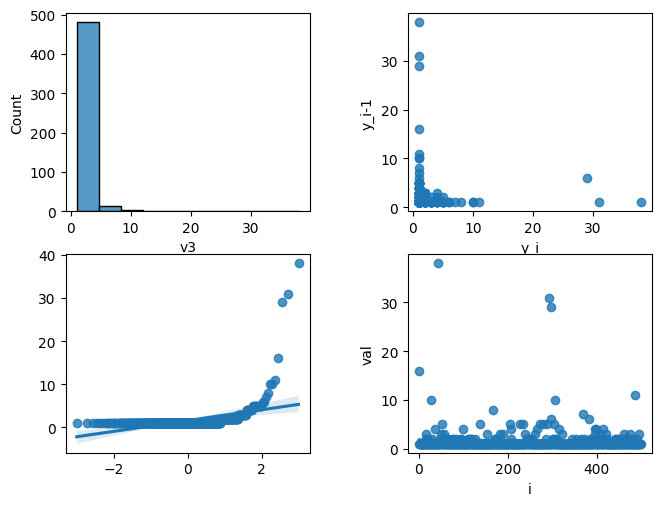

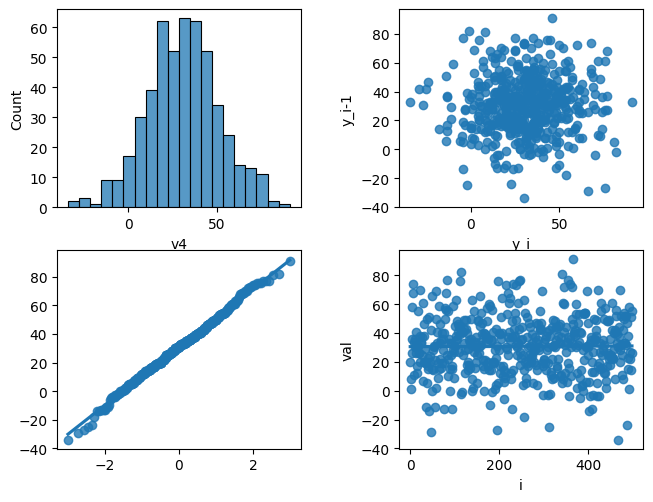

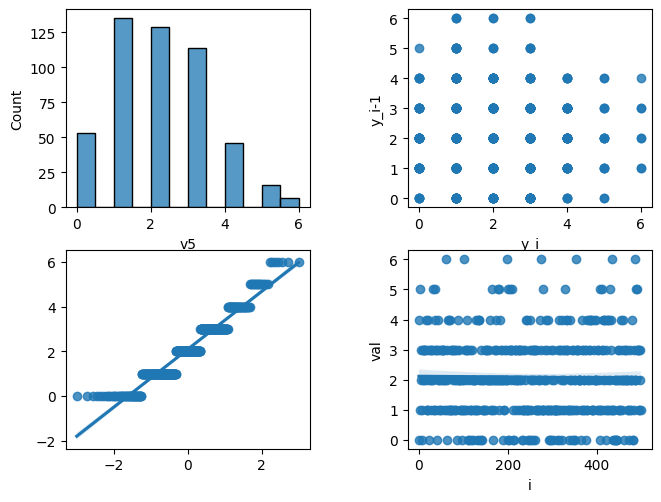

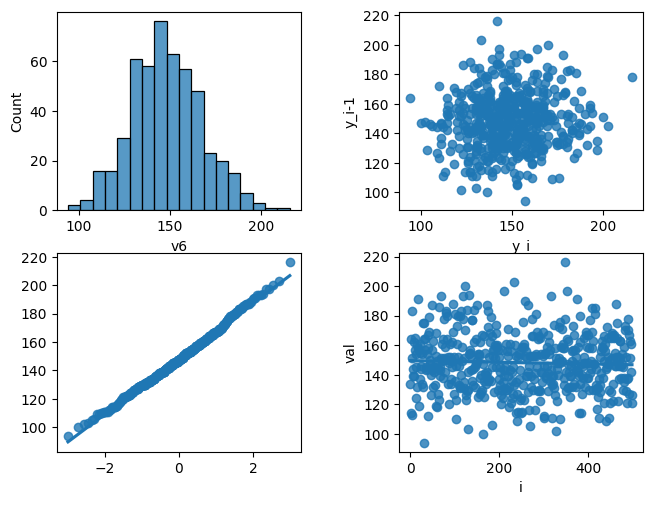

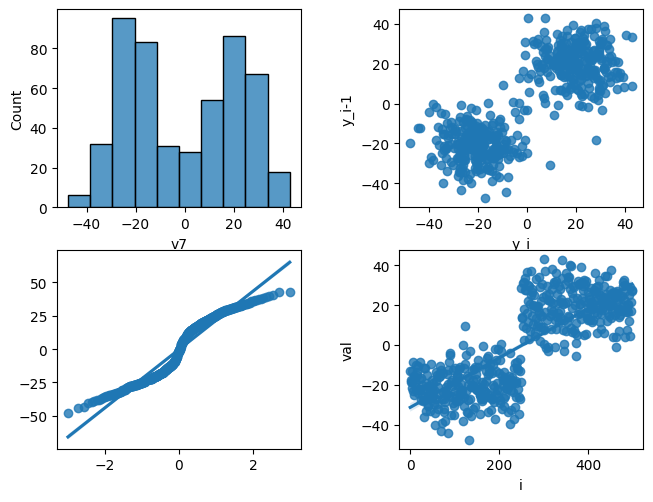

In [117]:
for i in range(9):
    multiplePlots(distributions[distributions.columns[i]])

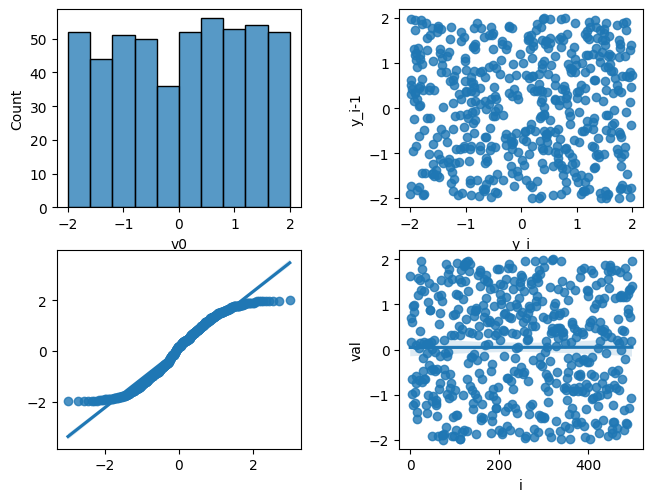

In [118]:
multiplePlots(distributions['v0'])

normal distribution

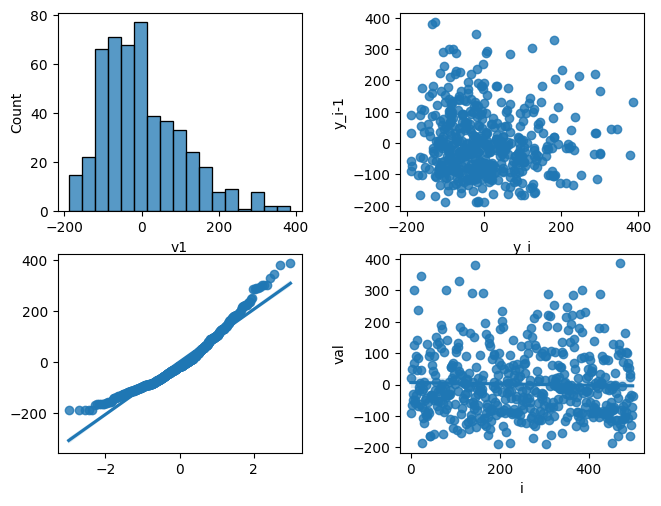

In [119]:
multiplePlots(distributions['v1'])

right-skewed

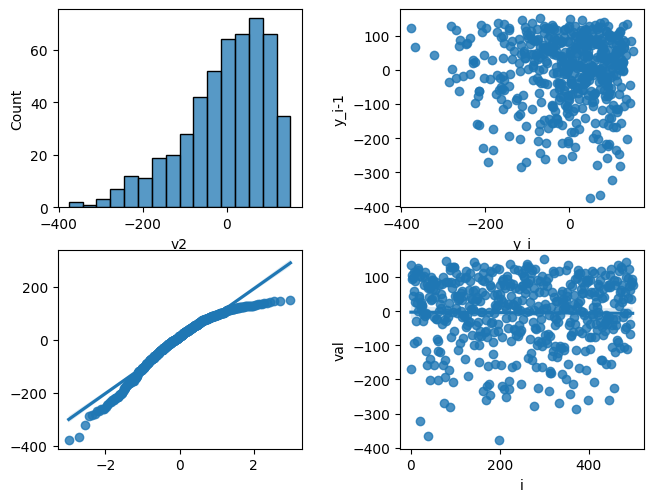

In [120]:
multiplePlots(distributions['v2'])

left-skewed

## Remember to submit your notebook in .ipynb and .html formats via Canvas